In [1]:
# -*- coding:utf-8
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import librosa
import soundfile
import pyaudio #录制和播放
import wave # 导入wave库，处理音频
import time
import matplotlib.pyplot as plt
from scipy.io import wavfile #读取wav提取数据
from pydub import AudioSegment #　音频处理
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体（可以根据需要选择其他字体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def play_audio(rate,file_name): # rate 采用率 file_name保存文件名
    Chunk = 1024 # 读取的音频帧的大小
    Format = pyaudio.paInt16 #　音频格式为16位的整数
    Channels = 2 # 通道为2
    Rate = rate #采用率
    Record_times = 5 # 录制时间
    Nframes = int(Rate / Chunk * Record_times) # 计算出所需采集帧的数量
    File_name = file_name
    
    # 实例化一个对象
    p = pyaudio.PyAudio()
    
    # 使用该对象打开声卡，进入参数配置
    stream = p.open(format = Format,
                    channels = Channels,
                    rate = Rate,
                    input = True,
                    frames_per_buffer = Chunk)
    print("开始录音，整个过程持续五秒钟!!!")
    frames = []
    for i in range(0,Nframes):
        data = stream.read(Chunk)
        frames.append(data)
    print("完成录音!!!")
    
    # 关闭
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    # 存储wav
    wf = wave.open(File_name,'wb') # 写入wav文件
    wf.setnchannels(Channels)# 设置通道数
    wf.setsampwidth(p.get_sample_size(Format)) # 设置样本宽度
    wf.setframerate(Rate)# 设置采样率
    wf.writeframes(b''.join(frames)) # 将列表的数据会合写入文件
    wf.close()
    print(f"语音保存为{File_name}")
    

In [3]:
play_audio(16000,"实验5.wav")

开始录音，整个过程持续五秒钟!!!
完成录音!!!
语音保存为实验5.wav


In [4]:
def STFFT(x, win, nfft, inc):
    """
    计算短时傅里叶变换（STFT）

    参数:
    - x: 输入语音信号
    - win: 窗函数或帧长（如果是窗函数，则帧长取窗函数的长度）
    - nfft: FFT点数
    - inc: 帧移

    返回:
    - d: 语谱图矩阵
    """

    if isinstance(win, int):
        # 如果win是整数，则使用矩形窗口
        win = np.ones(win)

    M = len(win)  # 帧长
    hop_size = inc  # 帧移

    # 计算语谱图矩阵的列数
    num_frames = 1 + int(np.floor((len(x) - M) / hop_size))

    # 初始化语谱图矩阵
    d = np.zeros((nfft // 2 + 1, num_frames), dtype=np.complex128)

    for t in range(num_frames):
        start = t * hop_size
        end = start + M

        # 获取当前帧
        frame = x[start:end]

        # 加窗
        frame = frame * win

        # 进行FFT
        X = np.fft.fft(frame, n=nfft)

        # 取FFT结果的前一半（由于对称性）
        X = X[:nfft // 2 + 1]

        # 存储到语谱图矩阵中
        d[:, t] = X

    return d

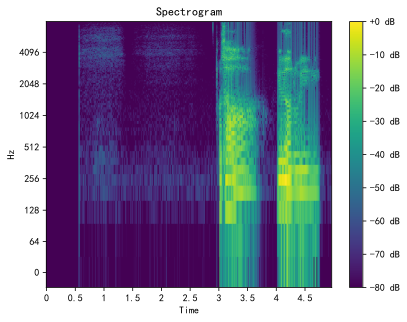

In [5]:

# 加载语音文件
x, fs = librosa.load("实验5.wav", sr=None)

# 参数设置
win = 400  # 帧长
nfft = 256 # 快速傅里叶的点数
inc = 160  # 帧移

# 计算语谱图
spectrogram = STFFT(x, win, nfft, inc)

# 显示语谱图
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), sr=fs, hop_length=inc, x_axis='time', y_axis='log', cmap='viridis')

# 添加颜色条
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()

## 思考题

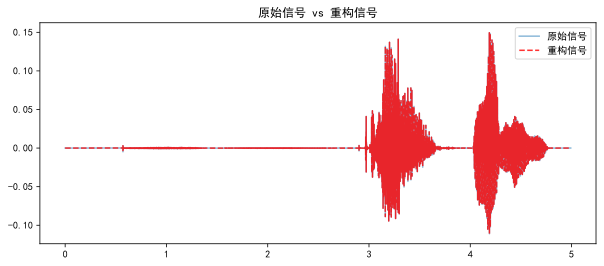

In [14]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# 读取音频文件
file_path = '实验5.wav'
y, sr = librosa.load(file_path, sr=None)

# 计算 STFT
n_fft = 2048  # FFT 窗口大小
hop_length = 512  # 滑动窗口的步长
spectrogram = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# 逆变换：重构信号
reconstructed_signal = librosa.istft(spectrogram, hop_length=hop_length)

# 显示原始信号的波形
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(y) / sr, len(y)), y, alpha=0.5, label='原始信号')

# 显示重构信号的波形
plt.plot(np.linspace(0, len(reconstructed_signal) / sr, len(reconstructed_signal)), reconstructed_signal, color='r', linestyle='--', alpha=0.8, label='重构信号')

# 设置中文标题
plt.title('原始信号 vs 重构信号')
plt.legend()
plt.show()
